In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve,accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn import tree, metrics
import pandas
from sklearn.cluster import KMeans 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Cleaned_data.csv to Cleaned_data.csv


In [55]:
import pandas as pd
df= pd.read_csv("Cleaned_data.csv",sep=",")
df

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1
...,...,...,...,...,...,...
825,4,47,2,1,3,0
826,4,56,4,5,3,1
827,4,64,4,5,3,0
828,5,66,4,5,3,1


In [4]:
print("Dữ liệu gốc:", df.shape)

Dữ liệu gốc: (830, 6)


In [ ]:
df.isnull().sum()

BI-RADS     0
Age         0
Shape       0
Margin      0
Density     0
Severity    0
dtype: int64

In [5]:
 df['BI-RADS'].value_counts()

4    468
5    317
3     24
6      9
2      7
0      5
Name: BI-RADS, dtype: int64

In [6]:
df['BI-RADS'][df[df['BI-RADS'] == 0].index] = 1

In [7]:
df['BI-RADS'][df[df['BI-RADS'] == 6].index] = 4

In [8]:
 df['BI-RADS'].value_counts()

4    477
5    317
3     24
2      7
1      5
Name: BI-RADS, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


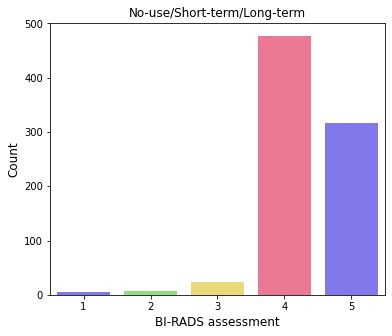

In [9]:
#Visualize mô hình đếm số lượng 
count = df['BI-RADS'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('BI-RADS assessment', fontsize=12)
plt.title('No-use/Short-term/Long-term')
#plt.savefig("count_BIBI.jpeg", format='jpeg', dpi=100)
plt.show()

In [10]:
 df['Age'].value_counts()

67    30
59    29
66    28
57    27
46    25
      ..
88     1
93     1
26     1
18     1
20     1
Name: Age, Length: 72, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


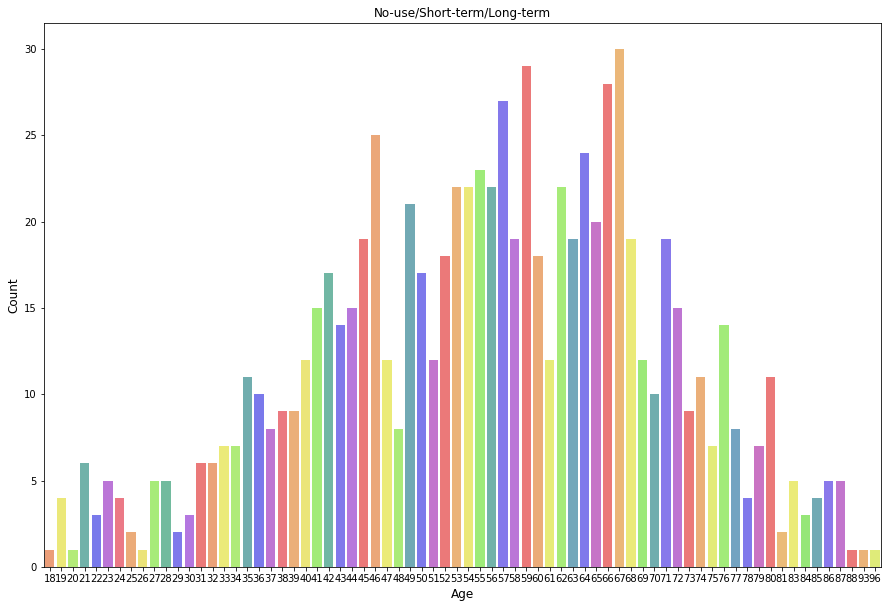

In [11]:
#Visualize mô hình đếm số lượng 
count = df['Age'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(15,10))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.title('No-use/Short-term/Long-term')
#plt.savefig("count_ageage.jpeg", format='jpeg', dpi=100)
plt.show()

In [12]:
 df['Shape'].value_counts()

4    379
1    190
2    180
3     81
Name: Shape, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


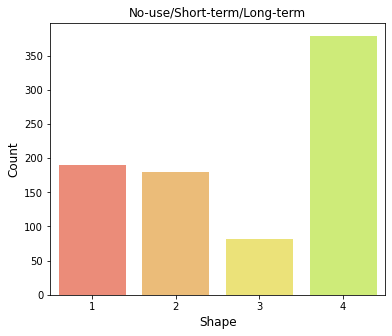

In [13]:
#Visualize mô hình đếm số lượng 
count = df['Shape'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Shape', fontsize=12)
plt.title('No-use/Short-term/Long-term')
#plt.savefig("count_shapeshape.jpeg", format='jpeg', dpi=100)
plt.show()

In [14]:
 df['Margin'].value_counts()

1    320
4    254
5    127
3    106
2     23
Name: Margin, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


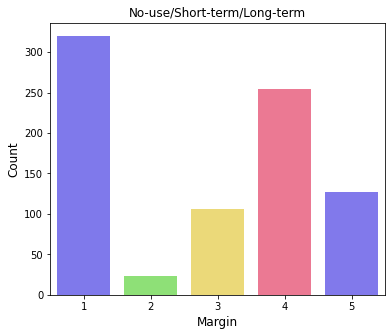

In [15]:
#Visualize mô hình đếm số lượng 
count = df['Margin'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Margin', fontsize=12)
plt.title('No-use/Short-term/Long-term')
#plt.savefig("count_margin.jpeg", format='jpeg', dpi=100)
plt.show()

In [16]:
 df['Density'].value_counts()

3    755
2     56
1     11
4      8
Name: Density, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


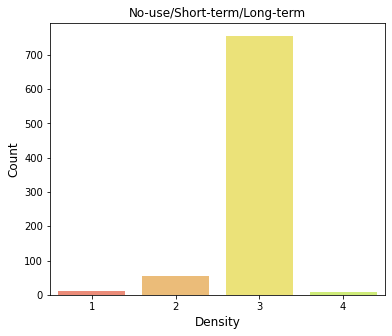

In [17]:
#Visualize mô hình đếm số lượng 
count = df['Density'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Density', fontsize=12)
plt.title('No-use/Short-term/Long-term')
#plt.savefig("count_densi.jpeg", format='jpeg', dpi=100)
plt.show()

In [18]:
 df['Severity'].value_counts()

0    427
1    403
Name: Severity, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


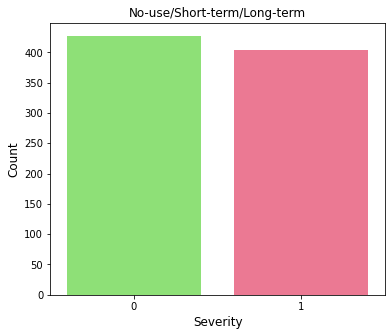

In [19]:
#Visualize mô hình đếm số lượng 
count = df['Severity'].value_counts()
sns.set_context(font_scale=1.5)
plt.figure(figsize=(6,5))
sns.barplot(count.index, count.values, alpha=0.6, palette="prism")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Severity', fontsize=12)
plt.title('No-use/Short-term/Long-term')
#plt.savefig("count_sever.jpeg", format='jpeg', dpi=100)
plt.show()

In [20]:
#Xem số liệu sau khi mã hóa data
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.318072,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.630956,14.671782,1.242361,1.567175,0.350936,0.500092
min,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


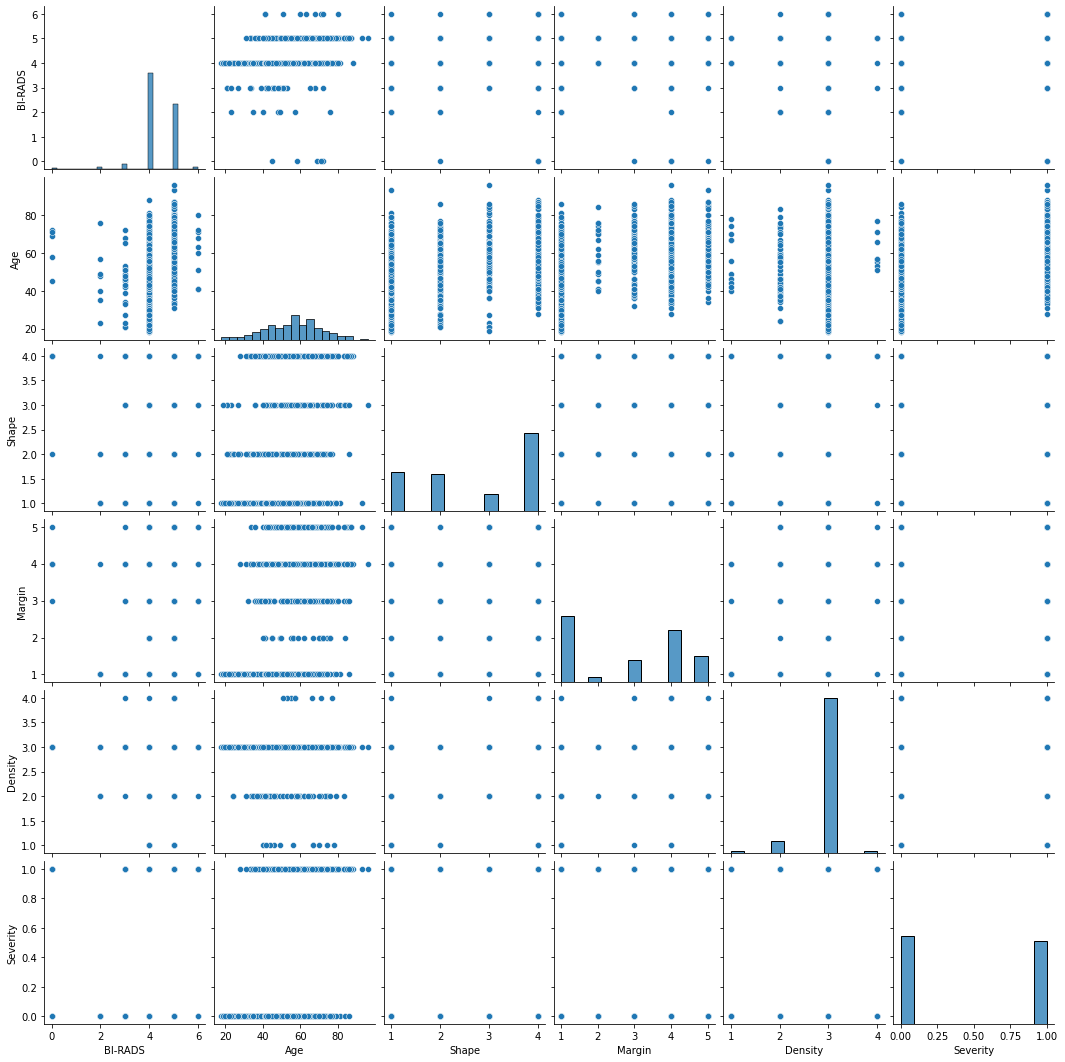

In [56]:
sns.pairplot(df)

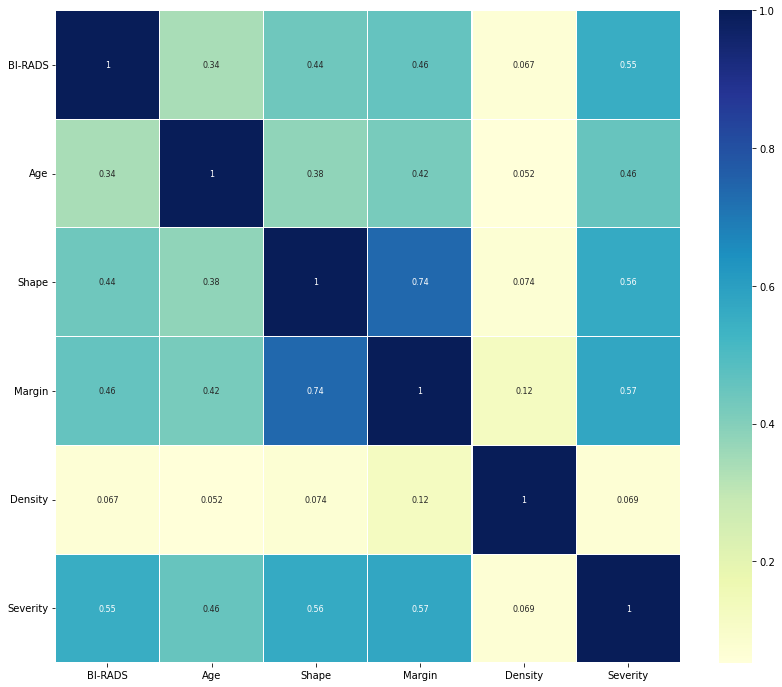

In [21]:
#Visualize mô hình thể hiện mối tương quan giữa các thuộc tính
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

In [22]:
df[['Severity', "Density"]].groupby(["Density"], as_index=False).mean().sort_values(by='Severity', ascending=False)

,Density,Severity
3,4,0.500000
2,3,0.498013
0,1,0.454545
1,2,0.321429


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


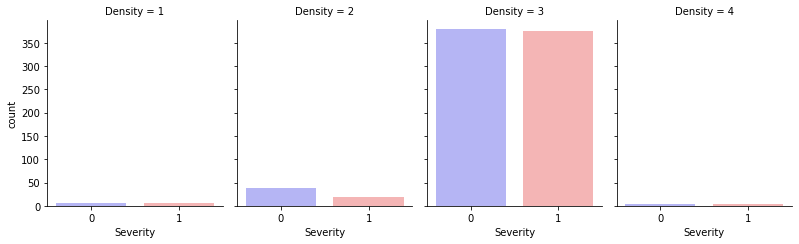

In [23]:
#Visualize thuộc tính trong bảng trên bằng biểu đồ
new_var=df[['Severity', "Density"]]
new_var=new_var[new_var["Density"]<=49]
sns.factorplot('Severity', col= "Density", data=new_var, kind='count', size=3.5, aspect=.8, col_wrap=4,palette="bwr");
#plt.savefig("gillcolor1.png", format='png', dpi=100, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

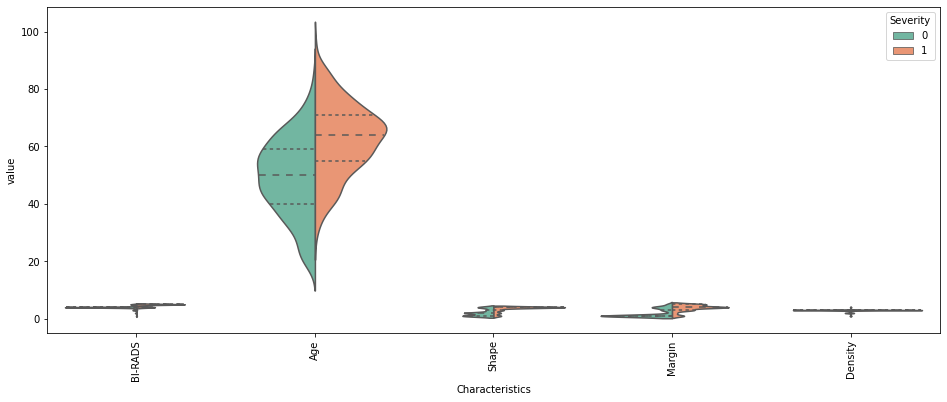

In [24]:
#Visualize biÃ¡Â»Âƒu Ã„Â‘Ã¡Â»Â“ Violin
df_div = pd.melt(df, "Severity", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="Severity", split = True, data=df_div, inner = 'quartile', palette = 'Set2')
df_no_class = df.drop(["Severity"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
plt.savefig("violinplot.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

# K-mean

In [38]:
#Chuẩn hóa dữ liệu standardization
sc=StandardScaler()
sc.fit(df)
standardized = sc.transform(df)
inverse = sc.inverse_transform(standardized)
inverse

array([[ 5., 67.,  3.,  5.,  3.,  1.],
       [ 5., 58.,  4.,  5.,  3.,  1.],
       [ 4., 28.,  1.,  1.,  3.,  0.],
       ...,
       [ 4., 64.,  4.,  5.,  3.,  0.],
       [ 5., 66.,  4.,  5.,  3.,  1.],
       [ 4., 62.,  3.,  3.,  3.,  0.]])

In [39]:
#Sau khi chuẩn hóa chuyển thành Dataframe (ctdl gắn nhãn hai chiều cột và hàng )
inverse=pd.DataFrame (inverse ,columns=[df])
inverse

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1.0
1,5.0,58.0,4.0,5.0,3.0,1.0
2,4.0,28.0,1.0,1.0,3.0,0.0
3,5.0,57.0,1.0,5.0,3.0,1.0
4,5.0,76.0,1.0,4.0,3.0,1.0
...,...,...,...,...,...,...
825,4.0,47.0,2.0,1.0,3.0,0.0
826,4.0,56.0,4.0,5.0,3.0,1.0
827,4.0,64.0,4.0,5.0,3.0,0.0
828,5.0,66.0,4.0,5.0,3.0,1.0


In [40]:
#sau chuẩn hóa
inverse.describe()

,BI-RADS,Age,Shape,Margin,Density,Severity
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.318072,55.781928,2.781928,2.813253,2.915663,0.485542
std,0.630956,14.671782,1.242361,1.567175,0.350936,0.500092
min,1.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,5.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [42]:
#sử dụng phương pháp elbow để tiềm số cụm tốt nhất 
Sum_of_squared_distance = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Sum_of_squared_distance.append(km.inertia_)

<function matplotlib.pyplot.show(*args, **kw)>

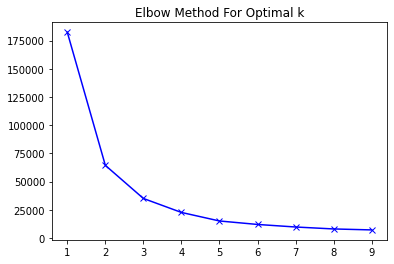

In [43]:
plt.plot(K,Sum_of_squared_distance, 'bx-')
plt.x='k'
plt.y='Sum_of_squared_distance'
plt.title('Elbow Method For Optimal k')
plt.show

In [44]:
#sử dụng k=3 để phân cụm 
km3 = KMeans(n_clusters=3)
km3 = km3.fit(df)

In [45]:
print(km3.labels_) #các cụm dc sinh ra

[0 2 1 2 0 1 1 2 2 2 2 2 2 1 2 0 1 2 1 2 2 1 0 2 0 2 0 2 2 0 0 0 0 2 2 2 2
 0 2 1 0 0 0 2 0 1 0 0 2 0 0 1 0 2 2 0 0 2 2 2 1 2 1 0 2 2 2 2 0 2 1 0 1 2
 1 0 0 0 0 1 2 0 2 0 0 2 2 2 2 0 1 2 0 0 2 1 2 0 1 1 1 0 0 0 2 0 1 2 1 2 2
 1 0 2 2 0 1 1 0 1 0 2 1 0 2 1 2 0 1 0 0 2 2 2 2 2 2 0 1 1 1 0 1 0 1 2 2 1
 1 1 2 0 2 1 2 2 1 0 0 0 2 0 1 0 2 1 0 2 1 1 0 1 1 2 1 1 1 2 1 0 2 0 0 0 0
 0 1 2 0 2 0 2 0 2 0 2 0 0 2 0 0 2 1 1 2 0 0 0 1 2 2 0 1 1 0 2 0 1 2 1 2 2
 1 2 2 2 2 1 1 2 2 0 0 0 1 0 2 0 0 2 1 1 0 1 1 1 0 2 0 2 2 2 0 0 0 0 1 1 2
 1 1 2 2 2 0 1 1 1 1 1 0 1 1 2 2 0 0 1 2 2 1 1 2 2 0 0 1 0 1 0 2 2 2 2 2 1
 0 0 0 0 2 0 2 2 0 2 1 0 2 0 1 2 0 1 0 0 0 0 0 0 2 1 0 2 1 2 0 0 0 2 1 1 0
 0 2 2 1 1 1 1 1 0 0 2 0 1 1 2 2 1 0 0 0 1 2 0 0 1 2 1 0 0 0 0 2 1 2 0 0 1
 0 1 2 2 2 2 1 2 2 1 1 2 1 1 2 1 2 1 1 2 2 2 2 0 2 2 2 0 1 1 1 1 1 1 2 0 0
 1 2 0 0 2 1 2 0 1 0 1 2 0 0 2 2 0 2 1 2 1 0 1 2 2 1 1 1 0 1 2 0 0 0 0 1 1
 1 1 2 0 2 0 1 2 0 0 1 2 2 1 0 2 1 1 2 1 1 0 1 2 2 2 0 2 1 2 2 0 2 2 1 2 2
 0 0 2 2 0 2 1 2 2 2 0 0 

In [46]:
lables=km3.labels_
lables=pd.DataFrame(lables, columns=['cluster'])
data_clustered=pd.concat([df,lables],axis=1) #axis=1-cột =0-hàng

In [47]:
#Phân loại theo cụm
data_clustered.sort_values('cluster',ascending=True)

,BI-RADS,Age,Shape,Margin,Density,Severity,cluster
0,5,67,3,5,3,1,0
423,5,71,2,4,3,1,0
420,5,67,2,4,3,1,0
419,5,65,4,5,3,1,0
416,5,73,4,5,3,1,0
...,...,...,...,...,...,...,...
488,4,63,4,4,3,1,2
486,4,54,2,1,3,0,2
484,5,59,1,5,3,1,2
107,4,53,4,4,3,0,2


In [48]:
#xem mỗi cụm có bao nhiêu phần tử 
print(km3.labels_)
data_clustered.groupby('cluster').size()

[0 2 1 2 0 1 1 2 2 2 2 2 2 1 2 0 1 2 1 2 2 1 0 2 0 2 0 2 2 0 0 0 0 2 2 2 2
 0 2 1 0 0 0 2 0 1 0 0 2 0 0 1 0 2 2 0 0 2 2 2 1 2 1 0 2 2 2 2 0 2 1 0 1 2
 1 0 0 0 0 1 2 0 2 0 0 2 2 2 2 0 1 2 0 0 2 1 2 0 1 1 1 0 0 0 2 0 1 2 1 2 2
 1 0 2 2 0 1 1 0 1 0 2 1 0 2 1 2 0 1 0 0 2 2 2 2 2 2 0 1 1 1 0 1 0 1 2 2 1
 1 1 2 0 2 1 2 2 1 0 0 0 2 0 1 0 2 1 0 2 1 1 0 1 1 2 1 1 1 2 1 0 2 0 0 0 0
 0 1 2 0 2 0 2 0 2 0 2 0 0 2 0 0 2 1 1 2 0 0 0 1 2 2 0 1 1 0 2 0 1 2 1 2 2
 1 2 2 2 2 1 1 2 2 0 0 0 1 0 2 0 0 2 1 1 0 1 1 1 0 2 0 2 2 2 0 0 0 0 1 1 2
 1 1 2 2 2 0 1 1 1 1 1 0 1 1 2 2 0 0 1 2 2 1 1 2 2 0 0 1 0 1 0 2 2 2 2 2 1
 0 0 0 0 2 0 2 2 0 2 1 0 2 0 1 2 0 1 0 0 0 0 0 0 2 1 0 2 1 2 0 0 0 2 1 1 0
 0 2 2 1 1 1 1 1 0 0 2 0 1 1 2 2 1 0 0 0 1 2 0 0 1 2 1 0 0 0 0 2 1 2 0 0 1
 0 1 2 2 2 2 1 2 2 1 1 2 1 1 2 1 2 1 1 2 2 2 2 0 2 2 2 0 1 1 1 1 1 1 2 0 0
 1 2 0 0 2 1 2 0 1 0 1 2 0 0 2 2 0 2 1 2 1 0 1 2 2 1 1 1 0 1 2 0 0 0 0 1 1
 1 1 2 0 2 0 1 2 0 0 1 2 2 1 0 2 1 1 2 1 1 0 1 2 2 2 0 2 1 2 2 0 2 2 1 2 2
 0 0 2 2 0 2 1 2 2 2 0 0 

cluster
0    275
1    232
2    323
dtype: int64

In [49]:
data_clustered.groupby('cluster').describe()

BI-RADS                                                 Age  \
          count      mean       std  min  25%  50%  75%  max  count   
cluster                                                               
0         275.0  4.534545  0.651841  1.0  4.0  5.0  5.0  5.0  275.0   
1         232.0  4.060345  0.562751  1.0  4.0  4.0  4.0  5.0  232.0   
2         323.0  4.318885  0.590175  1.0  4.0  4.0  5.0  5.0  323.0   

                    ... Density      Severity                                \
              mean  ...     75%  max    count      mean       std  min  25%   
cluster             ...                                                       
0        71.545455  ...     3.0  4.0    275.0  0.749091  0.434327  0.0  0.5   
1        37.383621  ...     3.0  3.0    232.0  0.215517  0.412070  0.0  0.0   
2        55.575851  ...     3.0  4.0    323.0  0.455108  0.498753  0.0  0.0   

                        
         50%  75%  max  
cluster                 
0        1.0  1.0  1.0  
1        0.0  0.0  1.0  
2        0.0  1.0  1.0  

[3 rows x 48 columns]

In [50]:
#lọc cụm 0 
data_clustered[data_clustered['cluster']==0]

,BI-RADS,Age,Shape,Margin,Density,Severity,cluster
0,5,67,3,5,3,1,0
4,5,76,1,4,3,1,0
15,5,75,4,5,3,1,0
22,4,81,1,1,3,0,0
24,5,67,3,4,2,1,0
...,...,...,...,...,...,...,...
819,1,71,4,4,3,1,0
820,5,67,4,5,3,1,0
821,4,68,4,4,3,1,0
827,4,64,4,5,3,0,0


In [52]:
#Trung tâm của cụm 
centroids = km3.cluster_centers_
centroids = pd.DataFrame(centroids,columns=[df])
centroids

,BI-RADS,Age,Shape,Margin,Density,Severity
0,4.534545,71.545455,3.272727,3.454545,2.930909,0.749091
1,4.060345,37.383621,2.112069,1.879310,2.857759,0.215517
2,4.318885,55.575851,2.845201,2.938080,2.944272,0.455108


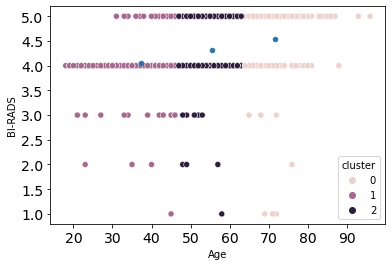

In [53]:
#vẽ 3 phân cụm
s1 = sns.scatterplot(data=data_clustered,x='Age',y='BI-RADS',hue='cluster')
centroids.plot(ax=s1, kind='scatter', x='Age',y='BI-RADS',fontsize=14)

# CÂY QUYẾT ĐỊNH

In [25]:
#XÃ¡Â»Â­ lÃƒÂ½ dÃ¡Â»Â¯ liÃ¡Â»Â‡u Ã„Â‘Ã¡Â»Âƒ vÃ¡ÂºÂ½ cÃƒÂ¢y quyÃ¡ÂºÂ¿t Ã„Â‘Ã¡Â»Â‹nh
X_dt = df.drop(["Severity"], axis=1)  
Y = df["Severity"]
X_train_dt, X_test_dt, Y_train_dt, Y_test_dt = train_test_split(X_dt, Y, random_state=42, test_size=0.3) #train 70% - test 30%

In [28]:
from sklearn.tree import DecisionTreeClassifier as DT
dt = DT(criterion='entropy',random_state=42)
dt.fit(X_train_dt, Y_train_dt)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [26]:
def train_and_test(model, train_data, test_data):
    """
    Trains the model on the training data, prints the score for such model evaluating it on the testing data
    and also returns the learned model
    model: classifier to be used
    train_data: [X_train_dt, Y_train_dt]
    test_data: [X_test_dt, Y_test_dt]
    """
    # Fits the model to the training data 
    model.fit(train_data[0], train_data[1])
    # Evaluates the model using the testing data
    print(model.score(test_data[0], test_data[1]))
    # Returns the fitted model
    return model

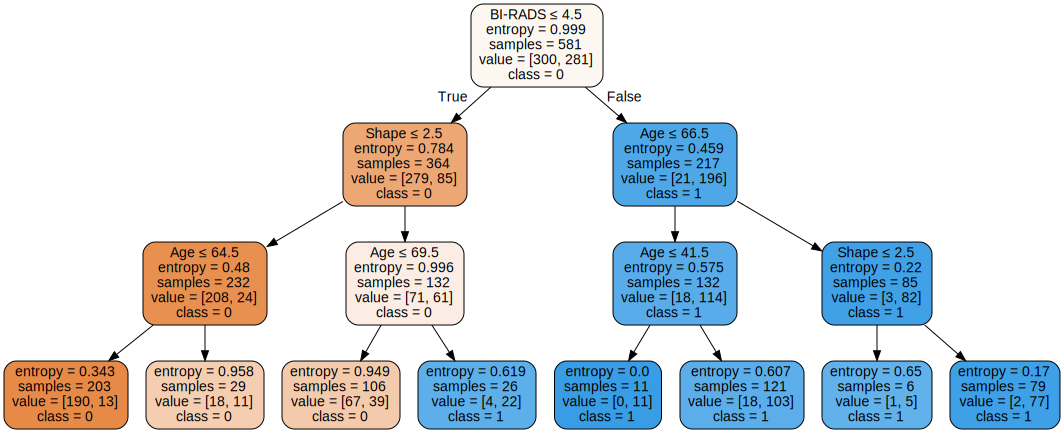

In [57]:
from sklearn.tree import DecisionTreeClassifier as clf
Y_name = ['0','1']
clf = DecisionTreeClassifier(criterion='entropy',
                             splitter='best', 
                             max_depth=3, 
                             min_samples_split=2, 
                             min_samples_leaf=1, 
                             min_weight_fraction_leaf=0.0, 
                             max_features=None, 
                             random_state=42, 
                             max_leaf_nodes=None, 
                             min_impurity_decrease=0.0, 
                             class_weight=None, 
                             ccp_alpha=0.0)
clf.fit(X_train_dt, Y_train_dt)
Y_pred_dt = clf.predict(X_test_dt)
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_dt.columns,
                         class_names=Y_name, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(filename='DecisionTree')
graph

In [58]:
from sklearn.model_selection import cross_val_predict, cross_val_score

print("TEST RESULTS:\n")
#Report
print('Decision Tree Classifier Report:\n\n{}\n'.format(classification_report(Y_test_dt, Y_pred_dt)))
res = cross_val_score(clf, X_test_dt,Y_test_dt, cv=10, n_jobs=-1, scoring='accuracy')
#Độ chính xác trung bình
print('Average Accuracy:\t{0:.4f}\n'.format((res.mean())))
#Độ lệch chuẩn
print('Standard Deviation:\t{0:.4f}\n'.format(res.std()))
#Ma trận hỗn hợp
print('Confusion Matrix:\n{}\n'.format(confusion_matrix(Y_test_dt,clf.predict(X_test_dt))))
#Điểm chính xác
print("Accuracy Score:\t\t{}%".format(round(clf.score(X_test_dt, Y_test_dt)*100, 2)))

TEST RESULTS:

Decision Tree Classifier Report:

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       127
           1       0.89      0.76      0.82       122

    accuracy                           0.84       249
   macro avg       0.85      0.84      0.84       249
weighted avg       0.85      0.84      0.84       249


Average Accuracy:	0.8555

Standard Deviation:	0.0623

Confusion Matrix:
[[116  11]
 [ 29  93]]

Accuracy Score:		83.94%


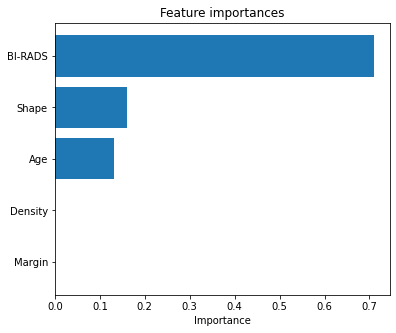

In [32]:
#Visualize biÃ¡Â»Âƒu Ã„Â‘Ã¡Â»Â“ thÃ¡Â»Âƒ hiÃ¡Â»Â‡n cÃƒÂ¡c Ã„Â‘Ã¡ÂºÂ·c tÃƒÂ­nh quan trÃ¡Â»Âng trong bÃ¡Â»Â™ dÃ¡Â»Â¯ liÃ¡Â»Â‡u Mushrooms
features_list = X_dt.columns.values
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(6,5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importances')
plt.draw()
plt.savefig("featureimp.png", format='png', dpi=100, bbox_inches='tight')
plt.show()

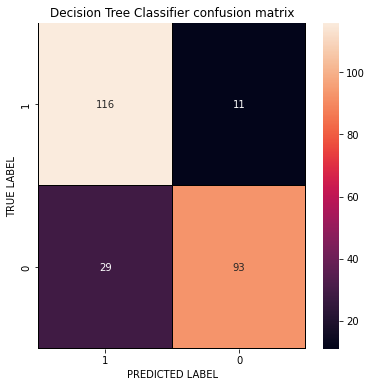

In [33]:
#Visualize Confusion Matrix (Ma trận hỗn hợp)
cfm_dt = confusion_matrix(Y_test_dt, Y_pred_dt)
x_axis_labels = ["1", "0"]
y_axis_labels = ["1", "0"]

f, ax = plt.subplots(figsize =(6,6))
sns.heatmap(cfm_dt, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.title('Decision Tree Classifier confusion matrix')
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL');
plt.savefig("dtcm.png", format='png', dpi=150, bbox_inches='tight')
plt.show()
#(edible:0 poisonous:1)

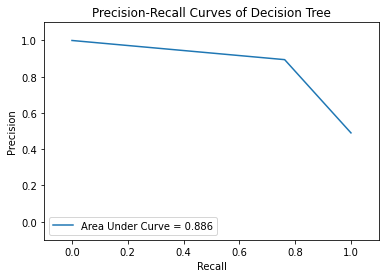

In [34]:
#Visualize đồ thị đường cong PR (Precision-Recall Curves)
precision, recall, thresholds = precision_recall_curve(Y_test_dt, Y_pred_dt)
area = auc(recall, precision)
plt.figure()
plt.plot(recall, precision, label = 'Area Under Curve = %0.3f'% area)
plt.legend(loc = 'lower left')
plt.title('Precision-Recall Curves of Decision Tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.1, 1.1])
plt.xlim([-0.1, 1.1])
plt.savefig("dtpr.png", format='png', dpi=150, bbox_inches='tight')
plt.show()